In [57]:
import pandas as pd

In [58]:
#Reading the dataset
data = pd.read_csv(r'C:\Users\Dan\Desktop\Sales Data Analysis Project\data\raw superstore data.csv')

#Creating Dataframe
df = pd.DataFrame(data)

Identifying and handling missing values

In [59]:
#Check for  missing values
df.isna().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [60]:
#Fill missing values
df['Postal Code'] = df['Postal Code'].fillna(0.0)


Check for duplicates

In [61]:
df.duplicated(['Row ID']).sum()

np.int64(0)

Fixing Data Types

In [62]:
#Check for data types
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

Turning columns into datetime

In [63]:
df['Order Date'] = pd.to_datetime(df['Order Date'],format='mixed',dayfirst=True) #Turning Order Date column to a datetime dtype
df['Order Date'] = df['Order Date'].ffill() #Filling missing values

df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='mixed', dayfirst=True)  
df['Ship Date'] = df['Ship Date'].ffill()



Turning columns into category dtypes

In [64]:
#Ship Mode , Segment, country, Region, Category, Subcategory, 
#Creating a function that turns columns into categorical dtypes
def turn_to_category_dtype(cols:list, df=df):
    for col in cols:
        df[col] = df[col].astype('category')
        

turn_to_category_dtype(['Country','Segment', 'Ship Mode', 'Region', 'Category', 'Sub-Category'])
print(df['Segment'].dtype)

category


Handling Outliers

In [65]:
df['Sales'].describe() #Getting full stats of the sales column

count     9800.000000
mean       230.769059
std        626.651875
min          0.444000
25%         17.248000
50%         54.490000
75%        210.605000
max      22638.480000
Name: Sales, dtype: float64

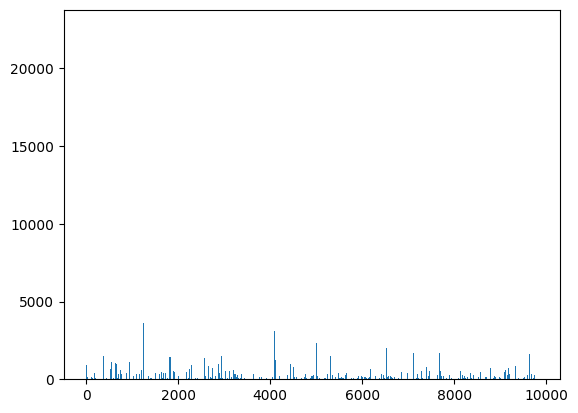

In [66]:
#Plotting a bar graph to detect outliers
import matplotlib.pyplot as plt

fig, axs = plt.subplots()
axs.bar(df['Row ID'], height=df['Sales'])
plt.show()

String Cleaning

In [67]:
#Cleaning column names
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('-','_')


In [68]:
#Cleaning column Values
# We start by removing leading or trailing spaces in the following columns:

df['ship_mode'] = df['ship_mode'].str.lstrip().str.rstrip()

def remove_trailing_leading_spaces(cols, df=df):
    """This function removes trailing and leading spaces in values in every column passed"""
    for col in cols:
        df[col] = df[col].str.lstrip().str.lstrip()


remove_trailing_leading_spaces(["order_id","ship_mode","customer_id","customer_name", "segment", "country","city","state","region","category","sub_category","product_id","product_name"])

def title_case_col_values(cols, df=df):
    """Function changes strings into titlecase"""
    for col in cols:
        df[col] = df[col].str.title()

title_case_col_values(["order_id","ship_mode","customer_id","customer_name", "segment", "country","city","state","region","category","sub_category","product_id","product_name"])

Exporting Data

In [69]:
df.to_csv(r"C:\Users\Dan\Desktop\Sales Data Analysis Project\data\cleaned_superstore.csv", index=False)

In [70]:
df.dtypes

row_id                    int64
order_id                 object
order_date       datetime64[ns]
ship_date        datetime64[ns]
ship_mode                object
customer_id              object
customer_name            object
segment                  object
country                  object
city                     object
state                    object
postal_code             float64
region                   object
product_id               object
category                 object
sub_category             object
product_name             object
sales                   float64
dtype: object